In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data=pd.read_csv('D:/abhipraja/codes/dataset/Fish.csv')
data.shape

(159, 7)

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Column Name	Details
Species	Species name of fish
Weight	Weight of fish in gram
Length1	Vertical length in CM
Length2	Diagonal length in CM
Length3	Cross length in CM
Height	Height in CM
Width	Diagonal width in CM

In [4]:
df1 = data.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5 )

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
116,Perch,900.0,36.5,39.0,41.4,11.1366,7.4934
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'correlation matrix')

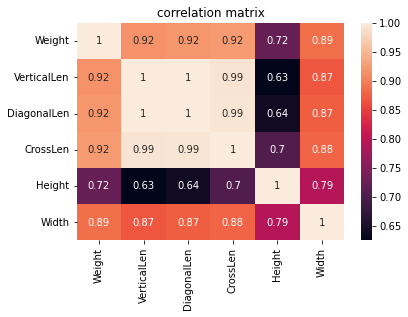

In [7]:
pl.rcParams['figure.figsize']=(10,6)
sns.heatmap(df1.corr(),annot=True)
pl.title('correlation matrix')

In [8]:
df2=df1.drop(['VerticalLen','DiagonalLen','CrossLen'],axis=1)
print('new dimension of dataset is=',df2.shape)
df2.head(3)

new dimension of dataset is= (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


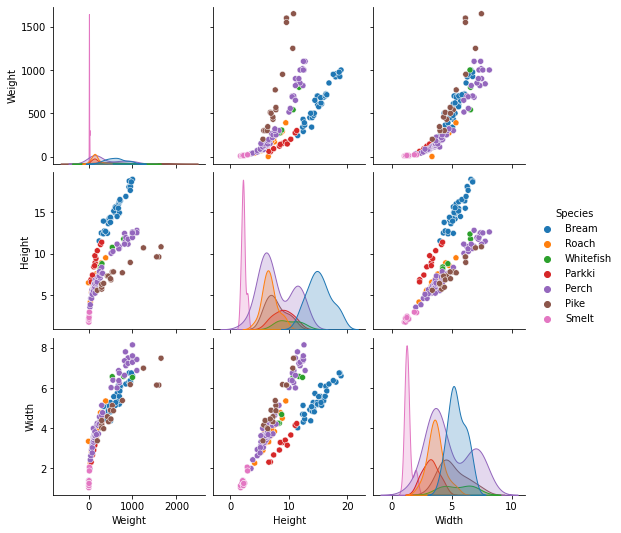

In [9]:
sns.pairplot(df2,kind='scatter',hue='Species')

In [10]:
def outlier_detection(dataframe):
    q1=dataframe.quantile(0.25)
    q3=dataframe.quantile(0.75)
    iqr=q3-q1
    upperEnd=q3+1.5*iqr
    lowerEnd=q3-1.5*iqr
    outlier=dataframe[(dataframe>upperEnd)|(dataframe<lowerEnd)]
    return outlier

Text(0.5, 1.0, 'Outlier Detection Based on weight')

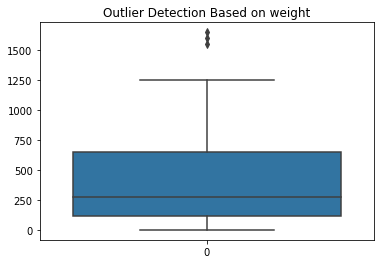

In [11]:
sns.boxplot(data=df2['Weight'])
pl.title('Outlier Detection Based on weight')

In [12]:
for column in df2.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(df2[column])
    print(outlier)


Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Height" 
72     2.1120
145    1.7388
146    1.9720
147    1.7284
148    2.1960
149    2.0832
150    1.9782
151    2.2139
152    2.2139
153    2.2044
154    2.0904
155    2.4300
156    2.2770
Name: Height, dtype: float64

Outliers in column "Width" 
35     2.2680
72     1.4080
73     1.9992
145    1.0476
146    1.1600
147    1.1484
148    1.3800
149    1.2772
150    1.2852
151    1.2838
152    1.1659
153    1.1484
154    1.3936
155    1.2690
156    1.2558
157    2.0672
158    1.8792
Name: Width, dtype: float64


In [13]:
dfTemp=df2.drop(['Weight'],axis='columns')

Text(0.5, 1.0, 'outlier detection for perch species')

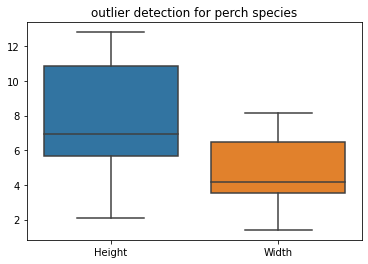

In [14]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Perch'])
pl.title('outlier detection for perch species')

In [15]:
dfPerch=df2[df2.Species=='Perch']
for column in dfPerch.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(dfPerch[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
72    2.112
Name: Height, dtype: float64

Outliers in column "Width" 
72    1.4080
73    1.9992
Name: Width, dtype: float64


Text(0.5, 1.0, 'Outlier Detection for beam species')

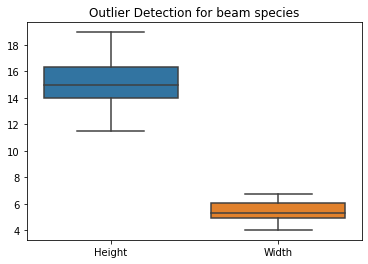

In [16]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Bream'])
pl.title('Outlier Detection for beam species')

In [17]:
dfBream=df2[df2.Species=='Bream']
for column in dfBream.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(dfBream[column])
    print(outlier)


Outliers in column "Weight" 
0    242.0
1    290.0
Name: Weight, dtype: float64

Outliers in column "Height" 
0    11.5200
1    12.4800
2    12.3778
3    12.7300
4    12.4440
7    12.6700
Name: Height, dtype: float64

Outliers in column "Width" 
0     4.0200
1     4.3056
12    4.3680
Name: Width, dtype: float64


Text(0.5, 1.0, 'outlier detection for roach species')

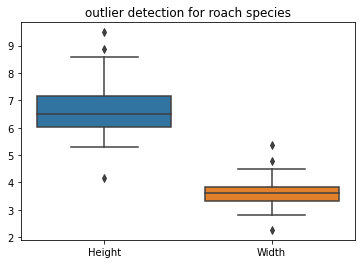

In [18]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Roach'])
pl.title('outlier detection for roach species')

In [19]:
dfRoach=df2[df2.Species=='Roach']
for column in dfRoach.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection((dfRoach[column]))
    print(outlier)


Outliers in column "Weight" 
35     40.0
36     69.0
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height" 
35    4.1472
36    5.2983
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width" 
35    2.2680
36    2.8217
37    2.9044
53    4.7736
54    5.3550
Name: Width, dtype: float64


Text(0.5, 1.0, 'outlier detection for pike species')

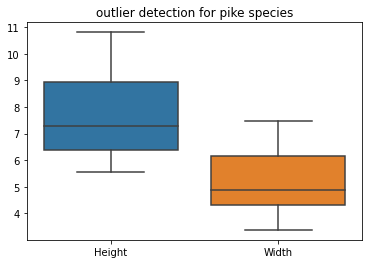

In [20]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Pike'])
pl.title('outlier detection for pike species')

In [21]:
dfPike=df2[df2.Species=='Pike']
for column in dfPike.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(dfPike[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
128    3.3756
Name: Width, dtype: float64


Text(0.5, 1.0, 'outlier detection for smelt species')

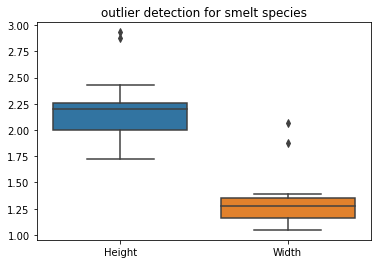

In [22]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Smelt'])
pl.title('outlier detection for smelt species')

In [23]:
dfSmelt=df2[df2.Species=='Smelt']
for column in dfSmelt.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(dfSmelt[column])
    print(outlier)


Outliers in column "Weight" 
145     6.7
147     7.0
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height" 
145    1.7388
147    1.7284
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width" 
145    1.0476
157    2.0672
158    1.8792
Name: Width, dtype: float64


Text(0.5, 1.0, 'outlier detection for parkki species')

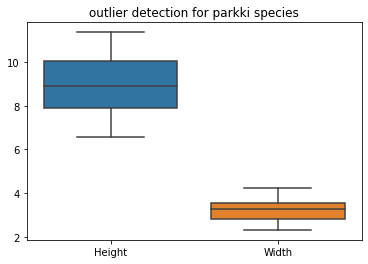

In [24]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Parkki'])
pl.title('outlier detection for parkki species')

In [25]:
dfParkki=df2[df2.Species=='Parkki']
for column in dfParkki.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(dfParkki[column])
    print(outlier)


Outliers in column "Weight" 
61    55.0
62    60.0
Name: Weight, dtype: float64

Outliers in column "Height" 
62    6.5772
Name: Height, dtype: float64

Outliers in column "Width" 
61    2.3265
62    2.3142
Name: Width, dtype: float64


Text(0.5, 1.0, 'outlier detection for whitefish species')

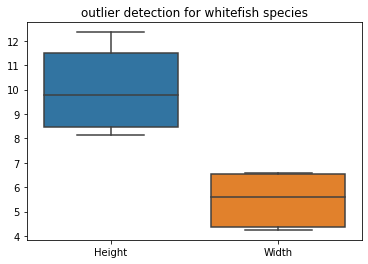

In [26]:
sns.boxplot(data=dfTemp[dfTemp.Species=='Whitefish'])
pl.title('outlier detection for whitefish species')

In [27]:
dfWhitefish=df2[df2.Species=='Whitefish']
for column in dfWhitefish.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier=outlier_detection(dfWhitefish[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


In [28]:
df3=df2.drop([35,54,157,158])
df3.shape

(155, 4)

In [29]:
df3.isna().sum()

Species    0
Weight     0
Height     0
Width      0
dtype: int64

In [30]:
df3[df3.Weight<=0]

,Species,Weight,Height,Width
40,Roach,0.0,6.4752,3.3516


In [31]:
df4=df3.drop([40])
df4.shape

(154, 4)

In [32]:
dummiesSpecies=pd.get_dummies(df4.Species)
dummiesSpecies.head(3)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [33]:
df5=pd.concat([df4,dummiesSpecies],axis='columns')
df5.head(3)

,Species,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,12.3778,4.6961,1,0,0,0,0,0,0


In [34]:
df6=df5.drop(['Species','Whitefish'],axis='columns')
df6.head()

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0
3,363.0,12.7300,4.4555,1,0,0,0,0,0
4,430.0,12.4440,5.1340,1,0,0,0,0,0


In [35]:
x= df6[['Height', 'Width', 'Bream', 'Parkki' ,'Perch', 'Pike', 'Roach', 'Smelt']]
y=df6[['Weight']]

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [37]:
from turtle import color


def ploynomialPlot(feature,label):
    xCoordinate=feature
    yCoordinate=np.squeeze(label)
    linearFunc=np.poly1d(np.polyfit(xCoordinate,yCoordinate,1))
    quadraticFunc=np.poly1d(np.polyfit(xCoordinate,yCoordinate,2))
    values=np.linspace(xCoordinate.min(),xCoordinate.max(),len(xCoordinate))
    pl.scatter(xCoordinate,yCoordinate,color='blue')
    pl.plot(values, linearFunc(values), color='cyan', linestyle='dashed', label='Linear Function')
    pl.plot(values, quadraticFunc(values), color='red', label='Quadratic Function')
    pl.xlabel('%s From Test Data'%(feature.name))
    pl.ylabel('Weight')
    pl.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    pl.legend()
    pl.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
    pl.show()

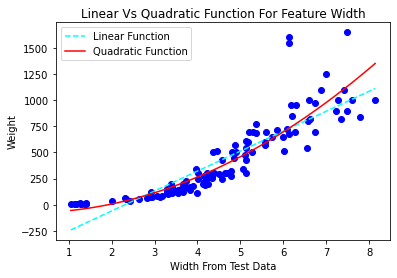

In [40]:
ploynomialPlot(xtrain.Width,ytrain)

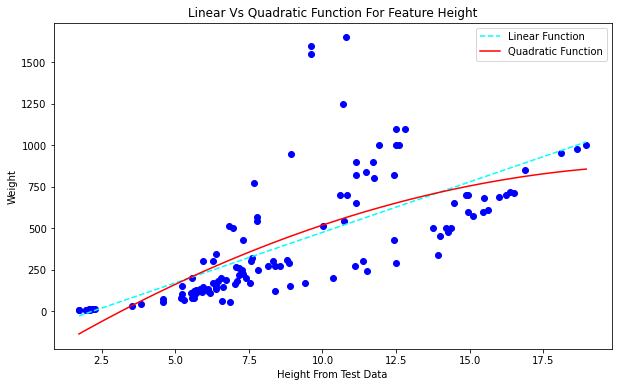

In [42]:
ploynomialPlot(xtrain.Height,ytrain)

In [43]:
poly=PolynomialFeatures(degree=2)
xPoly=poly.fit_transform(xtrain)
poly.fit(xPoly,ytrain)

PolynomialFeatures()

In [44]:
lm=linear_model.LinearRegression()
lm.fit(xPoly,ytrain)

LinearRegression()

In [45]:
predictions=lm.predict(poly.fit_transform(xtest))
print('r3_score',metrics.r2_score(ytest,predictions))

r3_score 0.9785548892707887


In [46]:
predictedWeight=pd.DataFrame(predictions,columns=['Predicted Weight'])
actualWeight=pd.DataFrame(ytest)
actualWeight=actualWeight.reset_index(drop=True)
dfActualVsPredicted=pd.concat([actualWeight,predictedWeight],axis=1)
dfActualVsPredicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,925.0000,725.000000,850.000000,1000.000000,140.00000,120.000000,690.000000,340.000000,450.000000,120.000000,...,300.000000,150.000000,85.000000,145.000000,10.000000,920.000000,13.400000,556.000000,90.00000,620.000000
Predicted Weight,1055.7936,747.478431,898.277537,944.533418,137.62057,129.536678,674.905295,374.566782,458.249622,136.627811,...,180.403377,130.218422,65.997357,139.633505,11.152461,929.510606,12.881099,639.195351,84.75865,612.176769


Text(0.5, 1.0, 'Weight from test data vs weight predicted by model')

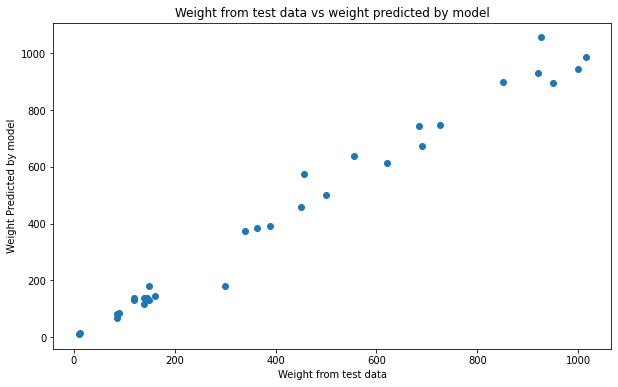

In [47]:
pl.scatter(ytest,predictions)
pl.xlabel('Weight from test data')
pl.ylabel('Weight Predicted by model')
pl.rcParams['figure.figsize']=(10,6)
pl.title('Weight from test data vs weight predicted by model')

Text(0.5, 1.0, 'histogram of residuals')

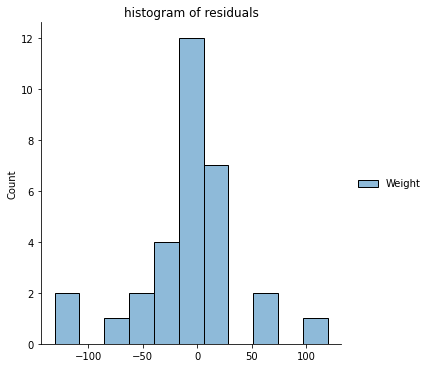

In [48]:
sns.displot((ytest-predictions))
pl.rcParams['figure.figsize']=(10,6)
pl.title('histogram of residuals')